# TASK-4

CAPM is also a tool for investor to understand whether an asset is fairly priced. To determine that, we need to use $\beta$ that we obtained from CAPM analysis and compare with the investor estimates. The `Security Market Line`(SML) is able to test whether securities are fairly priced or not.

More elaborately, SML exhibits the linear relationship between expected asset returns and betas obtained from CAPM. All the correctly priced securities are plotted on the SML. If the assets lie above the SML line, the assets are undervalued due to the higher return for a given amount of risk. Conversely, the assets lie below the SML are overvalued because it return of this stock is lower for a given amount of risk.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
#Note: Note: The data below is the one you retrieved in previous part and
#it is used here to run the rest of the analysis.

returns = pd.read_csv('returns.csv')
returns = returns.set_index('Date')
risk_free =  pd.read_csv('risk_free.csv')
risk_free = risk_free.set_index('Unnamed: 0')
risk_free.index.names = ['Date']

rf = risk_free / 90
rf = rf.dropna().iloc[:-1].values

y_aapl = returns['excess_return_AAPL']
X = returns['excess_return_GSPC']

X = sm.add_constant(X, prepend=False)
CAPM_AAPL = sm.OLS(y_aapl, X)
CAPM_results_AAPL = CAPM_AAPL.fit()

y_IBM=returns['excess_return_IBM']

X = sm.add_constant(X, prepend=False)
CAPM_IBM= sm.OLS(y_IBM, X)
CAPM_results_IBM = CAPM_IBM.fit()

y_MSFT=returns['excess_return_MSFT']

X = sm.add_constant(X, prepend=False)
CAPM_MSFT= sm.OLS(y_MSFT, X)
CAPM_results_MSFT = CAPM_MSFT.fit()

y_INTC=returns['excess_return_INTC']

X = sm.add_constant(X, prepend=False)
CAPM_INTC= sm.OLS(y_INTC, X)
CAPM_results_INTC = CAPM_INTC.fit()

In [3]:
def SML(rf, ret, betas):
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    plt.plot(1, ret, "ro")

In [4]:
rm = returns['GSPC'].mean()
rf_mean = rf.mean()

betas = [CAPM_results_AAPL.params[0], CAPM_results_IBM.params[0],
       CAPM_results_MSFT.params[0], CAPM_results_INTC.params[0]]

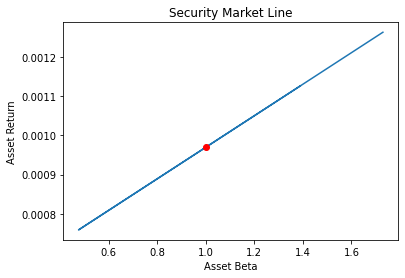

In [5]:
SML(rf_mean, rm, betas)

Given the beta, if the stock locates below the SML, this implies that stock has a lower return per unit of risk assumed. Hence, it can be concluded that the stock is overvalued and decide to sell the stock. Conversely, if the stock locates below the SML, stock has a lower return per unit of risk assumed, which is considered to be undervalued and buying a stock would be wise choice. 

Now suppose that the return expectations for 

* Apple is 0.1% 
* IBM is 0.05% 
* Microsoft is 0.025%
* Intel is 0.09%


In [6]:
ret_exp = [0.0010, 0.005, 0.0025, 0.0009]
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all = pd.concat([df_betas, df_ret_exp], axis=1)
df_all.columns = ['betas','ret_exp']
df_all.index = returns.columns[:4]

In [7]:
def over_under_val(rf, rm, stock):
    if rf_mean + (rm - rf_mean) * df_all['betas'].loc[stock] < df_all['ret_exp'].loc[stock]:
        print('The stock is undervalued')
    elif rf_mean + (rm - rf_mean) * df_all['betas'].loc[stock] > df_all['ret_exp'].loc[stock]:
        print('The stock is overvalued')
    else:
        print('The stock is fairly priced')

In [8]:
over_under_val(rf_mean, rm, 'INTC')

The stock is undervalued


In [9]:
market_std = returns['excess_return_GSPC'].std()

Now, it seem like you obtained  every inputs required to compute the ratios used for gauging the risk-reward combinations. We will do that using the scenarios provided in the instructions. Let me start with the first scenario, which is:

* If portfolio is not well-diversified

In this scenario, we are supposed to use Sharpe ratio in that if an investor holds a portfolio that is not fully diversified, total risk matters and Sharpe ratio consider the total risk. Recall that Sharpe ratio is:

$$Sharpe=\frac{r_i-r_f}{\sigma_i}$$

where $r_i$ and $\sigma_i$ denote return and standard deviation of the stock, respectively.

In [10]:
def sharpe(stocks, rf_mean, n_assets):
    sharpe_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = (returns.iloc[:, j].mean() - rf_mean) / np.std(returns.iloc[:, j])
    return sharpe_ratios

In [11]:
stocks = returns.columns[:4]
sharpe_ratios = sharpe(stocks, rf_mean, 4)
sharpe_ratios

{'AAPL': -0.08247667248153313,
 'IBM': 0.029469582728927995,
 'INTC': 0.141627567898596,
 'MSFT': 0.03246440962770829}

The second scenario is:
* If portfolio is well-diversified

This is an ideal situation for Treynor ratio, because Treynor ratio takes systematic risk into account to assess the risk-reward situation of an asset or a portfolio. In addition to this ratio, Jensen's alpha can be employed as well as it consider the systematic risk.

$$\text{Treynor ratio}=\frac{r_i-r_f}{\beta_i}$$

In [12]:
def treynor(stocks, rf_mean, n_assets):
    treynor_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        treynor_ratios[i] = (returns.iloc[:, j].mean() - rf_mean) / df_all['betas'][i]
    return treynor_ratios

In [13]:
treynor_ratios = treynor(stocks, rf_mean, 4)
treynor_ratios

{'AAPL': -0.0012308467968676737,
 'IBM': 0.0011316618066977173,
 'INTC': 0.0037124127277887364,
 'MSFT': 0.00029579990251644127}

Jensen's alpha is really easy to calculate as it is nothing but the the intercept term in the CAPM. 

In [14]:
print(f'Alpha for Apple is {CAPM_results_AAPL.params[1]}')
print(f'Alpha for IBM is {CAPM_results_IBM.params[1]}')
print(f'Alpha for Microsoft is {CAPM_results_MSFT.params[1]}')
print(f'Alpha for Intel is {CAPM_results_INTC.params[1]}')

Alpha for Apple is -0.002267275594090211
Alpha for IBM is 0.0003474135780603696
Alpha for Microsoft is 8.648965159527462e-05
Alpha for Intel is 0.0032388642098355007


Third and the last scenario is:
* If stock analyst performance matters

Intercept term ($\alpha$) in CAPM analysis reveals the stock analyst performance. So, the answer is Jensen's alpha again. Let's dig into more what happens if $\alpha$ takes on different values:

* Positive alpha: Analyst beats the market and gain profit
* Zero alpha: Analyst performance replicates the market performance
* Negative alpha: Poor analyst performance

It is time to interpret the result. Let's start off with the Sharpe ratio. The higher the Sharpe ratio is, the higher the return we gain per risk is. In this context, we are lloking for highest stock with Sharpe ratio, which is `Intel`. It would be a good choice to invest in Intel, because we gain more in relative to risk we assumed.

In [19]:
print(max(sharpe_ratios, key=sharpe_ratios.get))
print(max(sharpe_ratios.values()))

INTC
0.141627567898596


The `Apple` has the lowest Sharpe ratio indicating that it assumes higher risk per return in relative to other stocks considered.

In [20]:
print(min(sharpe_ratios, key=sharpe_ratios.get))
print(min(sharpe_ratios.values()))

AAPL
-0.08247667248153313


Once we calculate maximum and minimum Treynor ratios, it turns out that the results confirm the one we found in the Sharpe ratio. Still, the most and least feasible stocks are Intel and Apple, respectively.

In [21]:
print(max(treynor_ratios, key=treynor_ratios.get))
print(max(treynor_ratios.values()))

INTC
0.0037124127277887364


In [22]:
print(min(treynor_ratios, key=treynor_ratios.get))
print(min(treynor_ratios.values()))

AAPL
-0.0012308467968676737


As for the interpretation of Jensen's alpha, none of the intercept terms in the CAPM analysis are statistically significant. Therefore, we cannot draw a reliable result from Jensen's alpha. Nevertheless, for the sake of practice, I indicate the alpha values below: